In [3]:
import numpy as np, pickle, matplotlib, pathlib
import matplotlib.pyplot as plt, os
%matplotlib inline
from astropy.table import Table, vstack
from tqdm import trange
from SomLib import SelfOrgMap
import pyarrow.feather as ft
import pyarrow as pa
import pyarrow.compute as pc
import pandas as pd
import pyarrow.parquet as pq

In [4]:
data = pd.read_parquet('10050.parquet')

In [13]:
data.head()

,redshift,mag_u,mag_g,mag_r,mag_i,mag_z,mag_y,zp_u,zp_g,zp_r,...,psf_dcr_shifts_first_r,psf_dcr_shifts_first_i,psf_dcr_shifts_first_z,psf_dcr_shifts_first_y,psf_dcr_shifts_second_u,psf_dcr_shifts_second_g,psf_dcr_shifts_second_r,psf_dcr_shifts_second_i,psf_dcr_shifts_second_z,psf_dcr_shifts_second_y
0,1.946444,25.249953,25.592110,25.584822,25.632896,25.556199,25.458381,12.627925,14.486232,14.324932,...,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]"
1,1.944767,25.592903,25.927077,25.927748,25.984598,25.915271,25.828081,12.627925,14.486232,14.324932,...,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]"
2,1.947298,25.477316,25.800195,25.771481,25.797985,25.706289,25.594005,12.627925,14.486232,14.324932,...,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]"
3,1.946646,25.369104,25.713151,25.715138,25.772844,25.704479,25.615839,12.627925,14.486232,14.324932,...,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]"
4,1.946123,26.625856,26.480232,26.131092,25.931051,25.663803,25.417944,12.627925,14.486232,14.324932,...,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]","[[0.0, 0.0], [0.0, 0.0]]"


In [5]:
print(list(data.columns))

['redshift', 'mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'mag_y', 'zp_u', 'zp_g', 'zp_r', 'zp_i', 'zp_z', 'zp_y', 'alpha', 'base_wavelength', 'zenith_angle', 'parallactic_angle', 'psf_seeing_moment_ratio_u', 'psf_seeing_moment_ratio_g', 'psf_seeing_moment_ratio_r', 'psf_seeing_moment_ratio_i', 'psf_seeing_moment_ratio_z', 'psf_seeing_moment_ratio_y', 'psf_dcr_shifts_first_u', 'psf_dcr_shifts_first_g', 'psf_dcr_shifts_first_r', 'psf_dcr_shifts_first_i', 'psf_dcr_shifts_first_z', 'psf_dcr_shifts_first_y', 'psf_dcr_shifts_second_u', 'psf_dcr_shifts_second_g', 'psf_dcr_shifts_second_r', 'psf_dcr_shifts_second_i', 'psf_dcr_shifts_second_z', 'psf_dcr_shifts_second_y']


In [6]:
train = data.sample(frac = 0.05)
vali = data.drop(train.index)

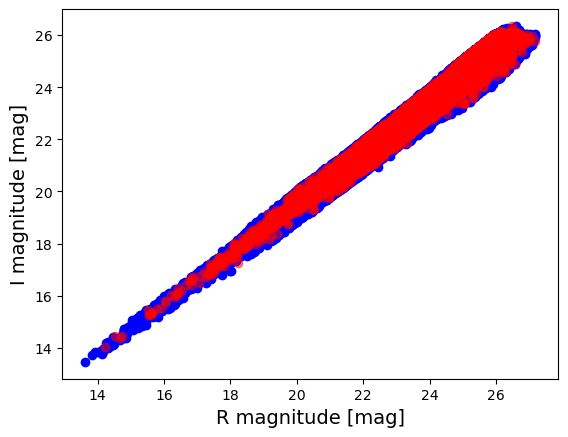

In [7]:
plt.figure()
plt.scatter(vali['mag_r'], vali['mag_i'], c = 'b')
plt.scatter(train['mag_r'], train['mag_i'], c = 'r', alpha = 0.5)

plt.xlabel('R magnitude [mag]', fontsize = 14)
plt.ylabel('I magnitude [mag]', fontsize = 14)

plt.show()

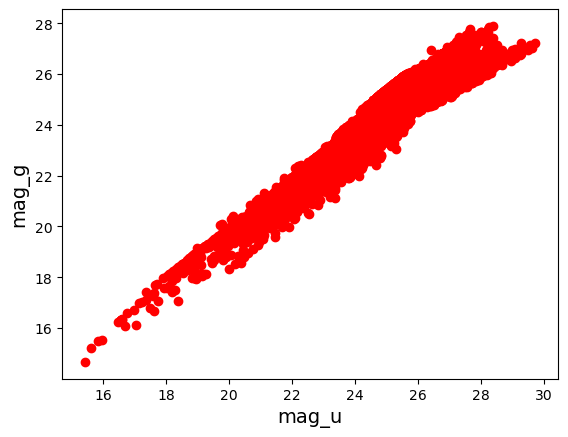

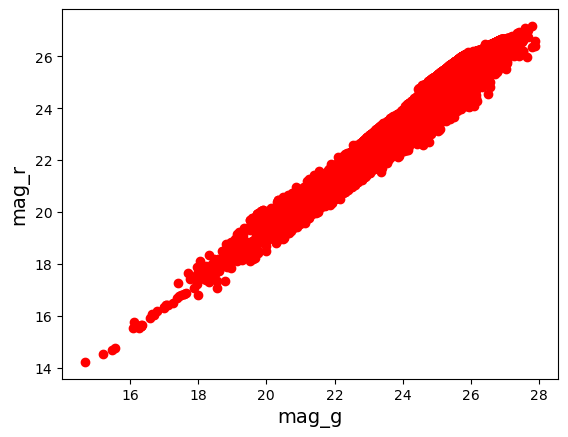

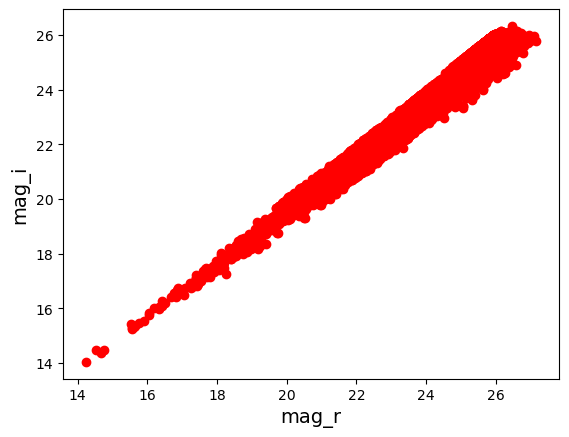

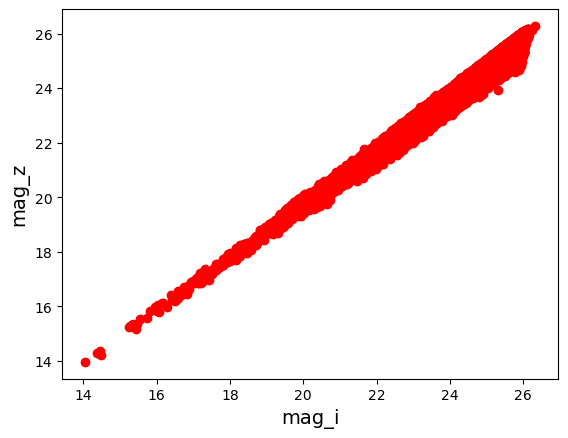

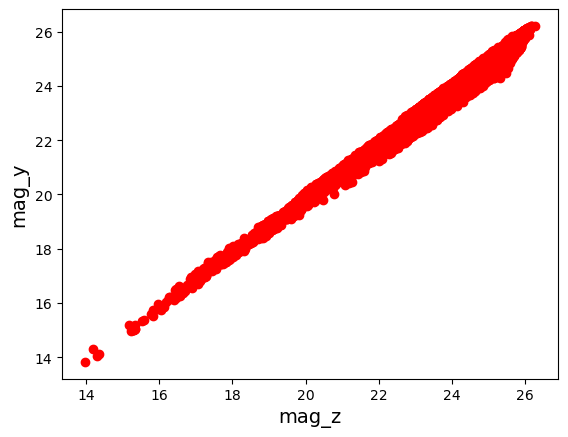

<Figure size 640x480 with 0 Axes>

In [8]:
data_keys = ['ug', 'gr', 'ri', 'iz', 'zy', 'i']
data_dict = {'ug':['mag_u','mag_g'], 'gr':['mag_g','mag_r'], 'ri':['mag_r','mag_i'], 'iz':['mag_i','mag_z'], \
             'zy':['mag_z','mag_y'], 'i':['mag_i']}

for i in data_dict:
    plt.figure()
    if len(data_dict[i]) > 1:
        plt.scatter(train[data_dict[i][0]], train[data_dict[i][1]], c = 'r')

        plt.xlabel(f'{data_dict[i][0]}', fontsize = 14)
        plt.ylabel(f'{data_dict[i][1]}', fontsize = 14)

        plt.show()

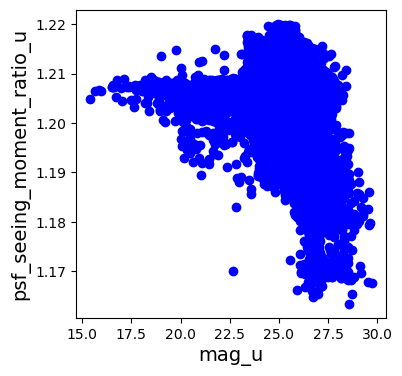

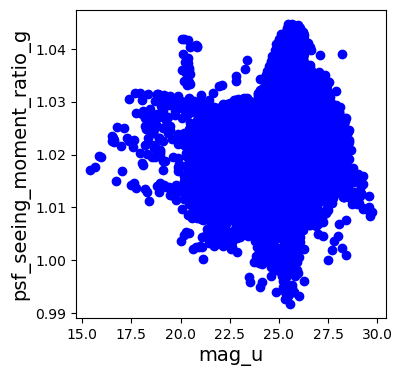

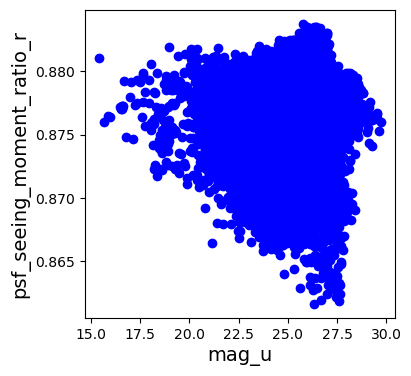

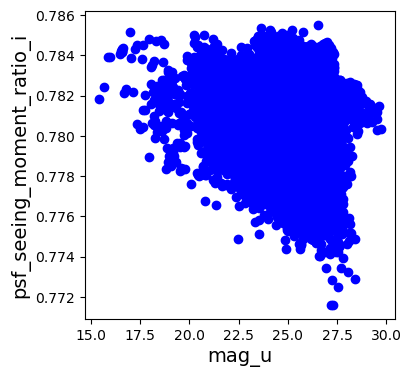

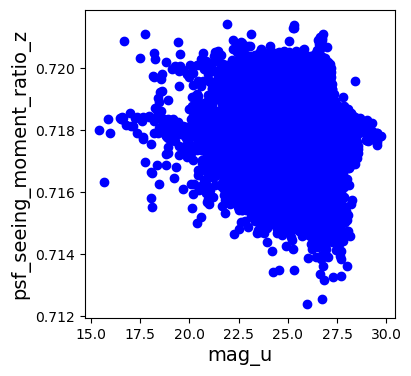

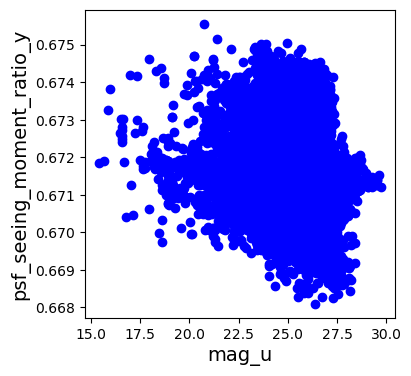

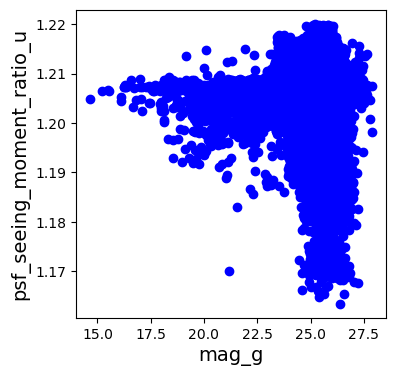

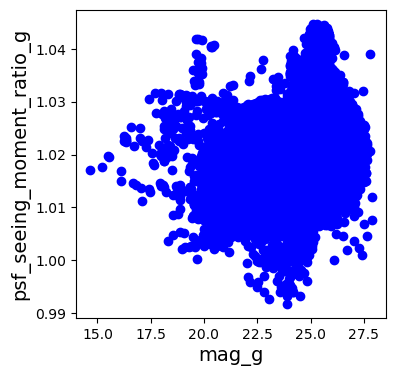

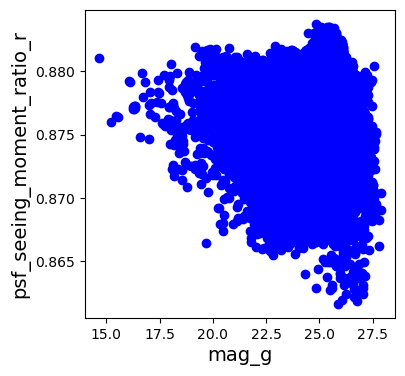

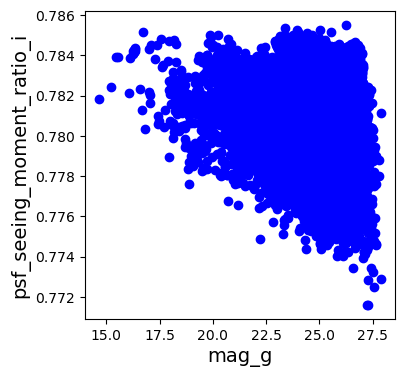

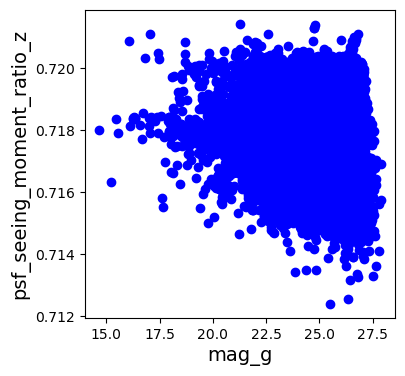

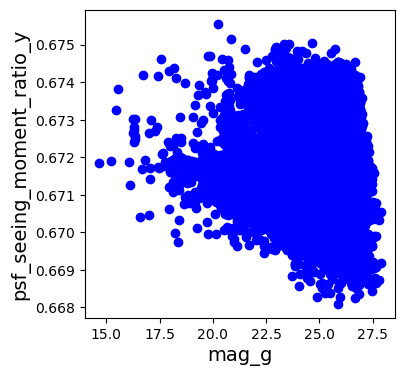

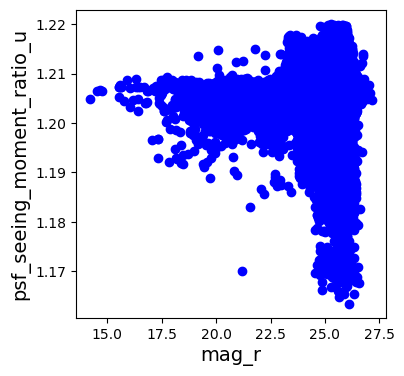

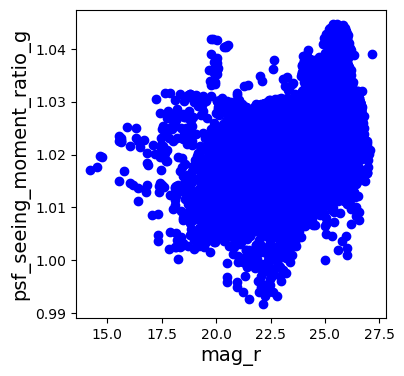

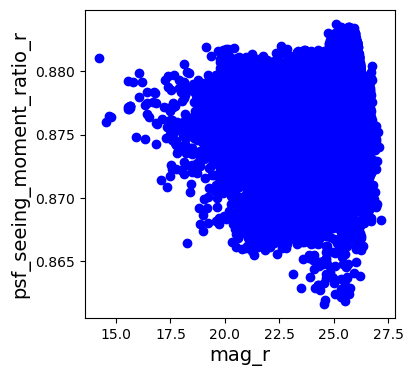

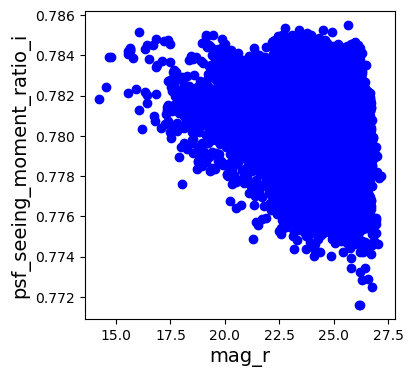

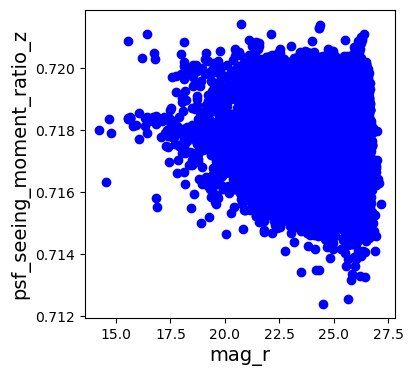

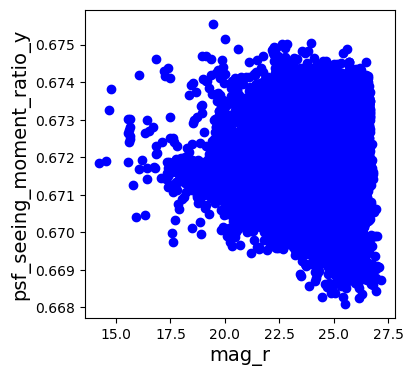

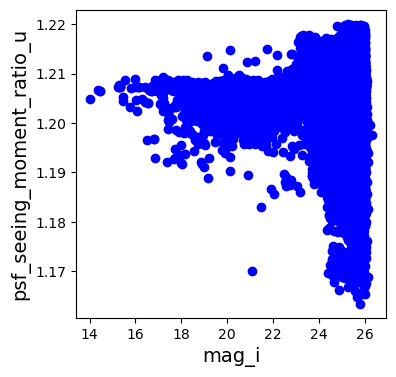

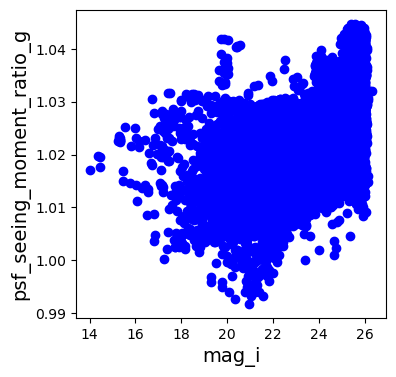

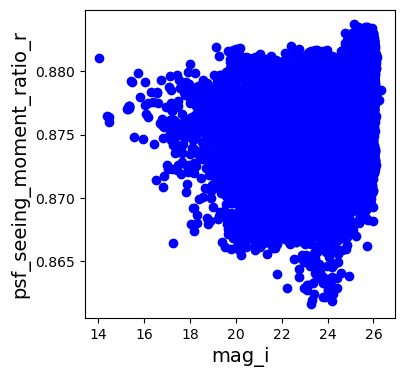

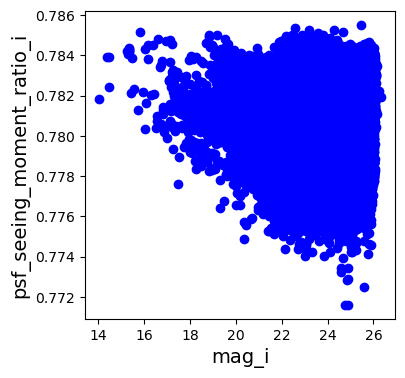

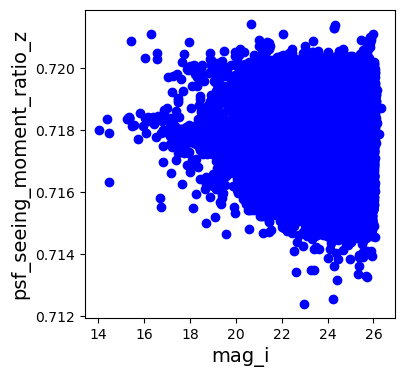

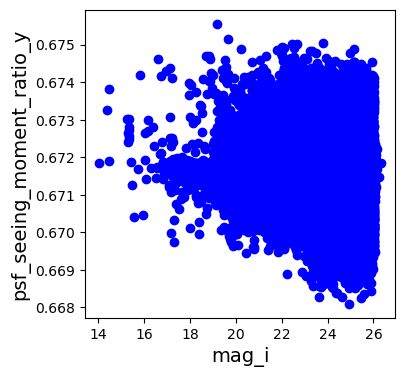

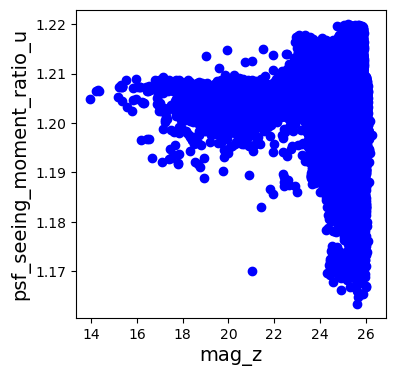

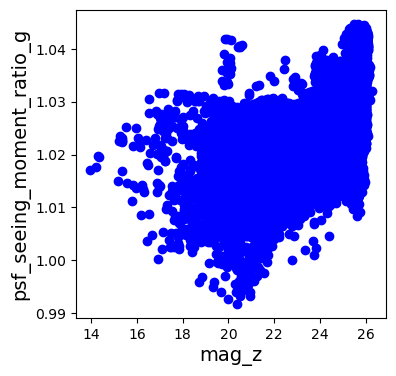

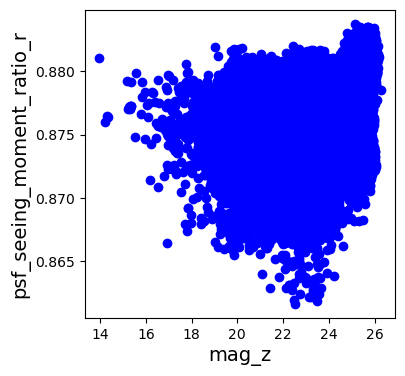

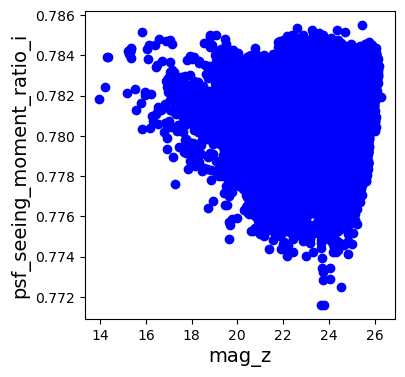

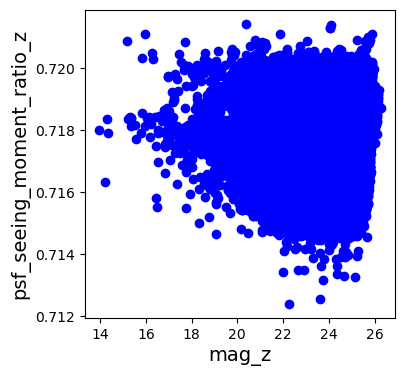

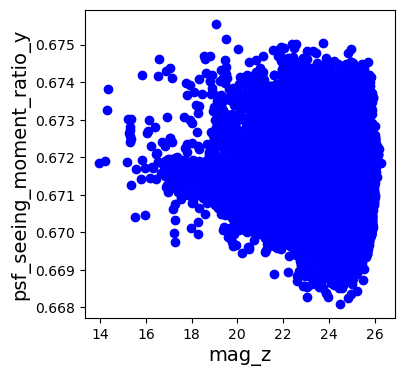

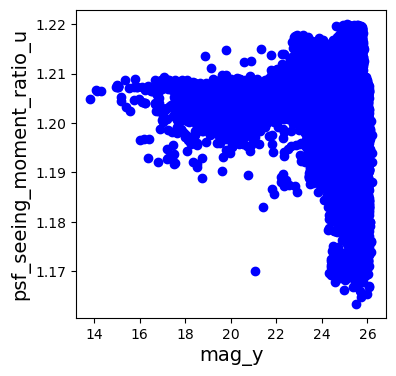

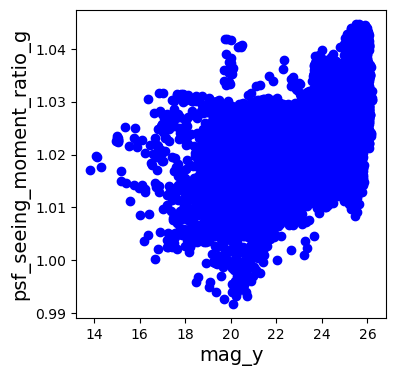

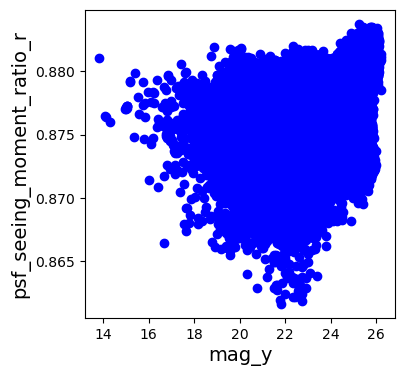

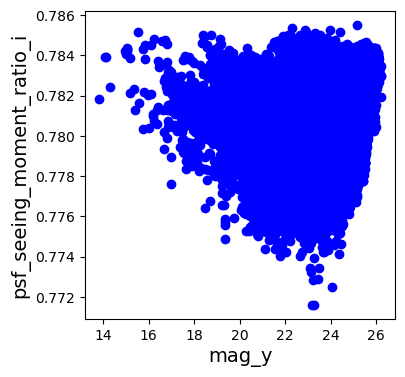

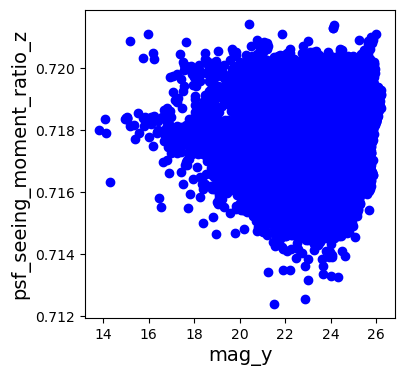

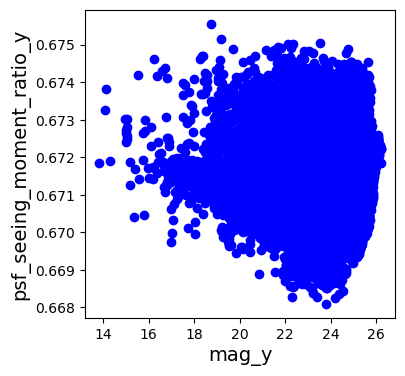

In [18]:
list_mag = ['mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'mag_y']
list_psf_smr = ['psf_seeing_moment_ratio_u', 'psf_seeing_moment_ratio_g', 'psf_seeing_moment_ratio_r', \
                'psf_seeing_moment_ratio_i', 'psf_seeing_moment_ratio_z', 'psf_seeing_moment_ratio_y']

for i in list_mag:
    for j in list_psf_smr:
        plt.figure(figsize = (4, 4))
        plt.scatter(train[i], train[j], c = 'b')

        plt.xlabel((i), fontsize = 14)
        plt.ylabel((j), fontsize = 14)

        plt.show()

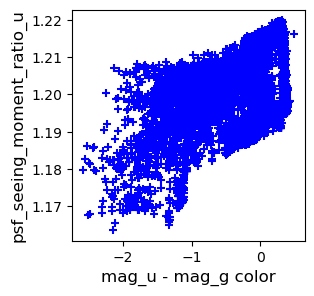

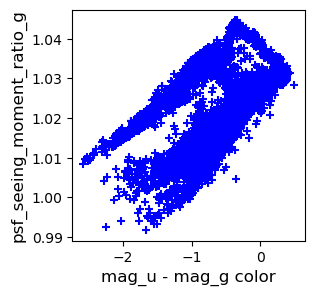

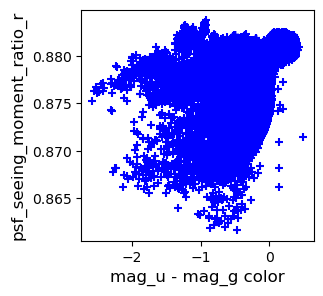

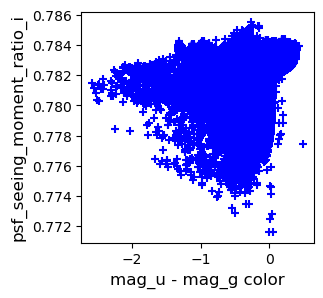

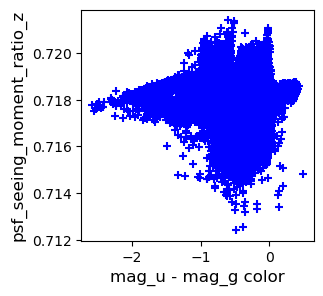

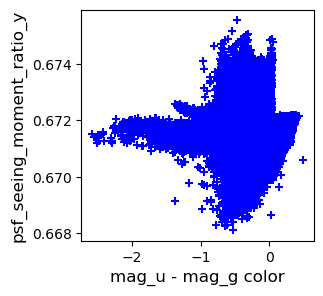

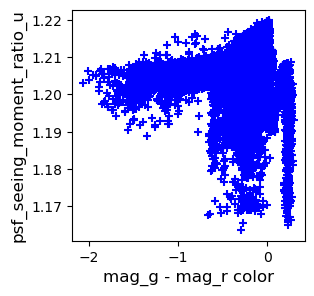

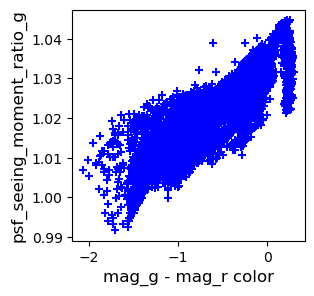

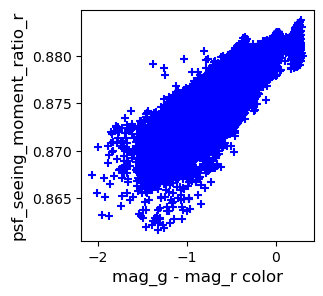

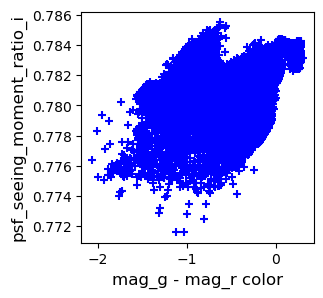

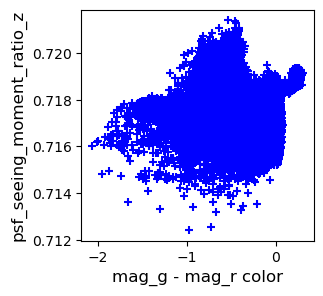

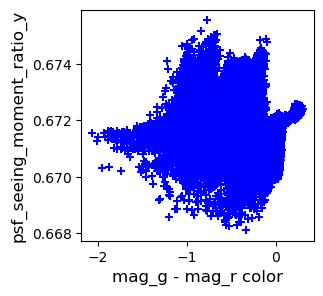

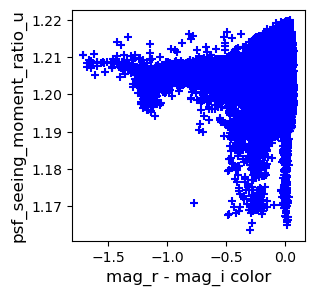

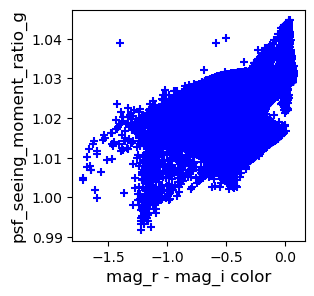

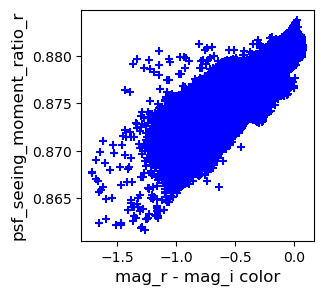

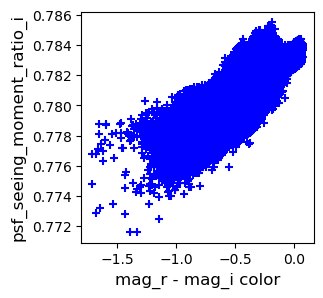

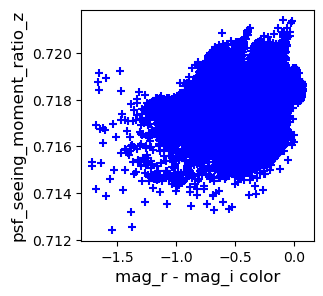

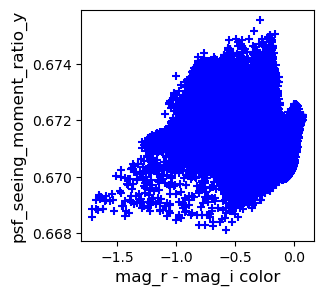

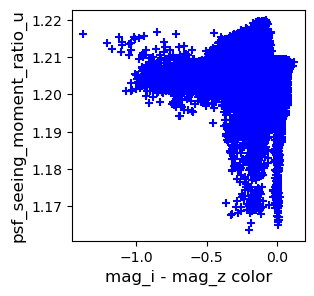

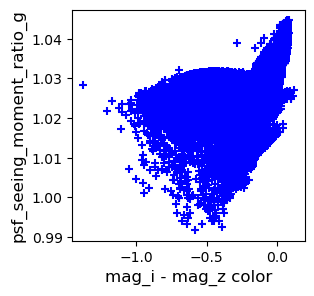

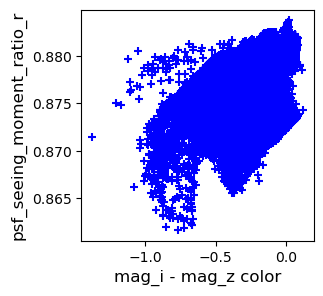

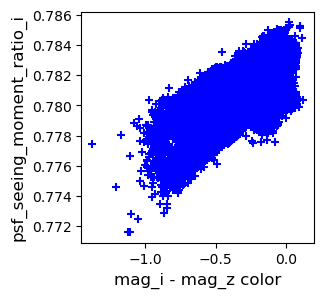

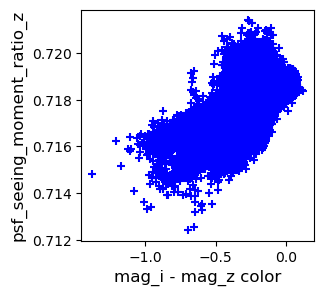

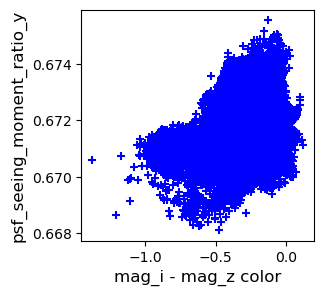

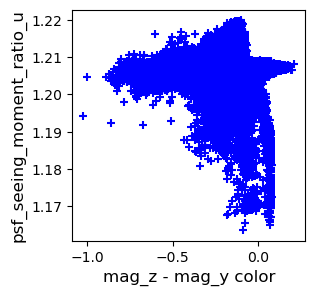

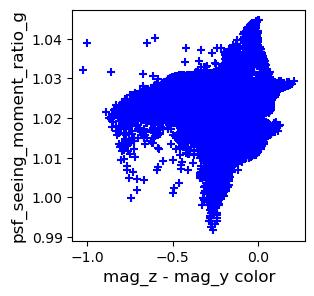

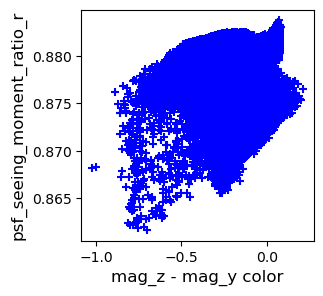

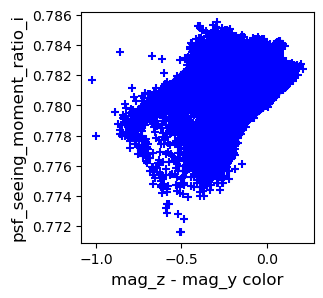

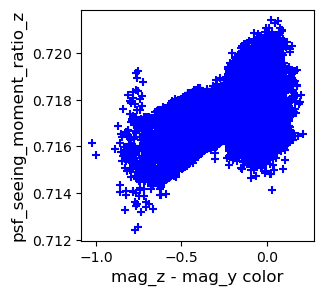

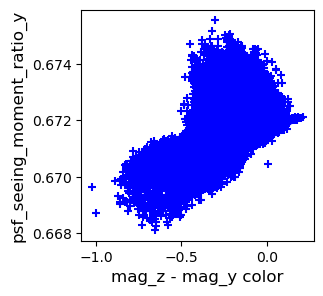

In [22]:
list_mag = ['mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'mag_y']

list_psf_smr = ['psf_seeing_moment_ratio_u', 'psf_seeing_moment_ratio_g', 'psf_seeing_moment_ratio_r', \
                'psf_seeing_moment_ratio_i', 'psf_seeing_moment_ratio_z', 'psf_seeing_moment_ratio_y']

prev_i = list_mag[0]
for i in list_mag[1:]:
    for j in list_psf_smr:
        plt.figure(figsize = (3,3))
        plt.scatter(train[i]  - train[prev_i], train[j], c = 'b', marker = '+')

        plt.xlabel(f'{prev_i} - {i} color', fontsize = 12)
        plt.ylabel(j, fontsize = 12)

        plt.show()
    prev_i = i